In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import seaborn as sns

#Choose Your Own Adventure!

This week's exercises include a "grab bag" of options for you to choose a few topics to explore in more depth. I've included a short summary at the top of each section to give you an idea of what it involves.  Chose to do 10 or more. Score 80% to get the 1 mastery credit.

##  Option 1  More Dataviz! (4 total points available)

Topics:


*   more practice with general data visualization in 2D and 3D
*   exploring more types of plotting functions and what they might be good for
  * (note that most of the other sets of exercises below will also include some data visualization; this set will just be focused on it)

#Visualizing Errors/Uncertainty (1 point)
When visualizing scientific data, it's important to be aware of uncertainty and include it in our visualizations. One way to do this is to show errorbars:

    plt.errorbar(xvals, yvals, yerr=err, fmt='o', label='Data')

Below, generate some data for a function of your choice with associated uncertainty in both the x and y values.
Referring to the errorbar documentation if you need, generate a scatter plot (i.e. no "connecting the dots") with  both of these sets of error bars visualized:


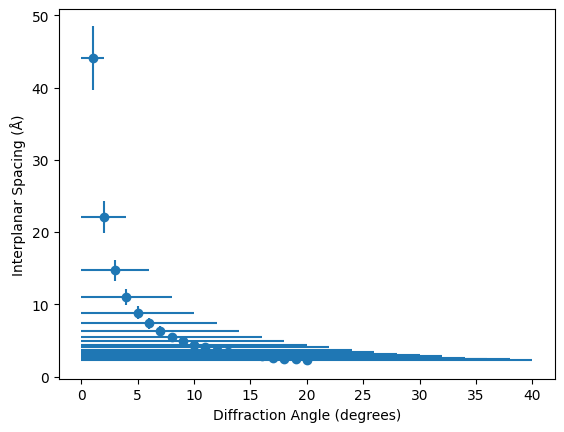

In [ ]:
def calculate_interplanar_spacing(diffraction_angle, wavelength=1.54, n=1):
    d = (n * wavelength) / (2 * np.sin(np.radians(diffraction_angle)))
    return d

xvals = []
yvals = []
xerrors = []
yerrors = []

for i in range(1, 21):
    xvals.append(i)
    yvals.append(calculate_interplanar_spacing(i))
    xerrors.append(xvals[-1]) # Arbitrary x err
    yerrors.append(0.1 * yvals[-1]) # Arbitrary y err

plt.errorbar(xvals, yvals, xerr=xerrors, yerr=yerrors, fmt='o', label='Data')
plt.xlabel('Diffraction Angle (degrees)')
plt.ylabel('Interplanar Spacing (Å)')
plt.show()

##Statistical Visualization and Subplots (2 points)

The included file data.mat contains two datasets, x1 and x2. Let's explore some ways to visualize their distributions. Make sure that file is in your working directory and import them to your workspace using a read statement.

First, let's make histograms. Using the documentation page here, make visualize the histograms of each dataset on one plot below:



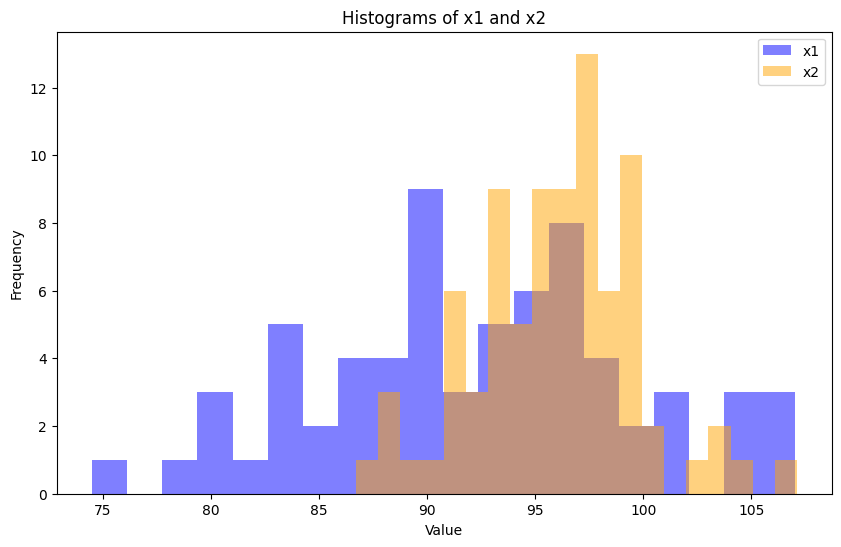

In [ ]:
# from google.colab import files
# uploaded = files.upload()

mat_data = scipy.io.loadmat('data.mat')

x1 = mat_data['x1'].flatten()
x2 = mat_data['x2'].flatten()

plt.figure(figsize=(10,6))
plt.hist(x1, bins=20, alpha=0.5, label='x1', color='blue')
plt.hist(x2, bins=20, alpha=0.5, label='x2', color='orange')

plt.title('Histograms of x1 and x2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

For the next two types of visualization, the vectors x1 and x2 need labels. Concatenate your data vectors into a new vector called data.
With these new variables, use the function boxchart to visualize the two distributions. Make sure to add axis labels, etc.! (NOTE: matplotlib has boxplots, but many python users chose the Seaborn or Plotly library for these plots. You will likely need one of these for the next section plotting so this is a good chance for you to explore these other plotting libraries).


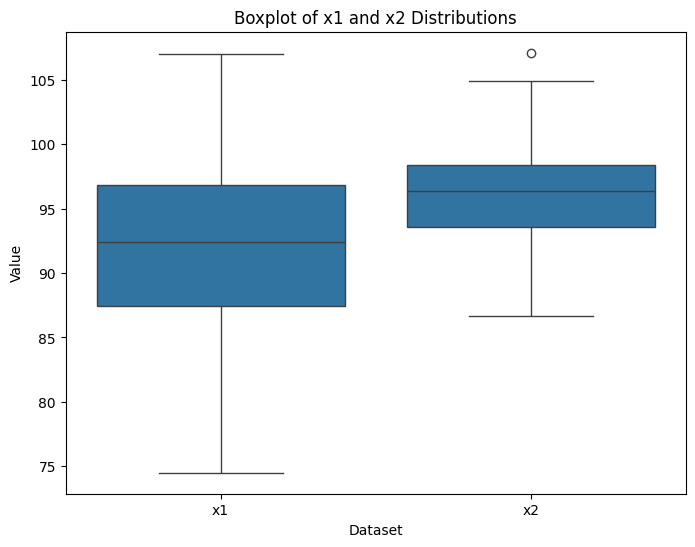

In [ ]:
data = np.concatenate((x1, x2))
labels = np.array(['x1'] * len(x1) + ['x2'] * len(x2))
df = pd.DataFrame({'Data': data, 'Dataset': labels})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Dataset', y='Data', data=df)

plt.title('Boxplot of x1 and x2 Distributions')
plt.xlabel('Dataset')
plt.ylabel('Value')

plt.show()

Now do the same thing but with swarm chart:


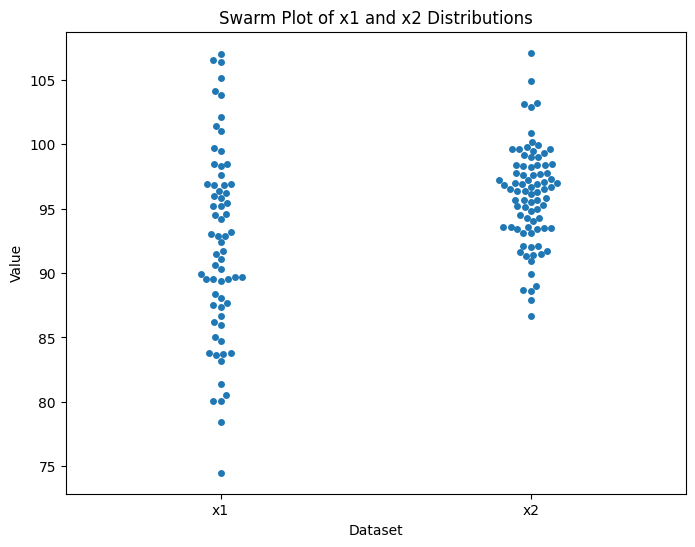

In [ ]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Dataset', y='Data', data=df)

plt.title('Swarm Plot of x1 and x2 Distributions')
plt.xlabel('Dataset')
plt.ylabel('Value')

plt.show()

Finally, let's combine these plots into a single figure using subplot.



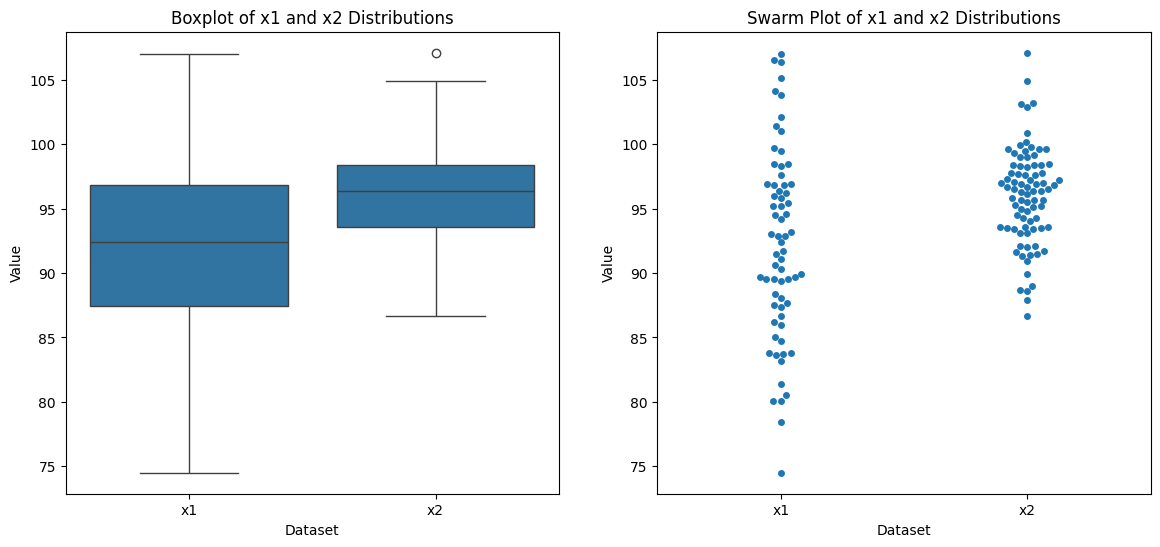

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Dataset', y='Data', data=df, ax=axes[0])
axes[0].set_title('Boxplot of x1 and x2 Distributions')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Value')

sns.swarmplot(x='Dataset', y='Data', data=df, ax=axes[1])
axes[1].set_title('Swarm Plot of x1 and x2 Distributions')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Value')

plt.show()

##Exploring! (1 point)

Take a look at the gallery of plotting options in Seaborn and/or Plotly. Pick a function you think looks cool and either find or generate some data that would be appropriate to visualize with it, and make me a cool plot below:

<Figure size 1000x800 with 0 Axes>

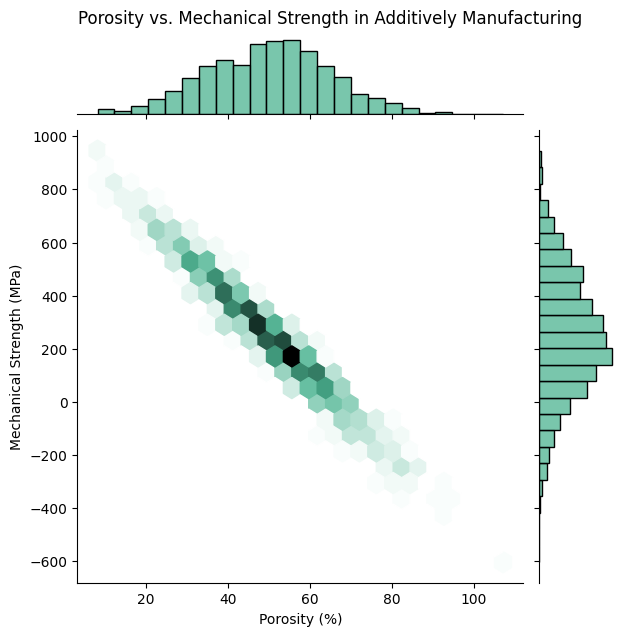

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

porosity = np.random.normal(50, 15, 1000)
strength = 1000 - porosity * 15 + np.random.normal(0, 50, 1000)

plt.figure(figsize=(10, 8))
sns.jointplot(x=porosity, y=strength, kind="hex", color="#4CB391")

plt.xlabel('Porosity (%)')
plt.ylabel('Mechanical Strength (MPa)')
plt.suptitle('Porosity vs. Mechanical Strength in Additively Manufacturing', y=1.02)
plt.show()


## Option 2   More Programming! (6 total points available)

Topics:


*   practice writing and using your own functions
*   practice converting pseudocode into actual code

###Context: Carnot Engine

You may have seen the idea of a Carnot cycle in 27-215. As a reminder, it is an ideal thermodynamic cycle whose PV diagram consists of two isotherms (1→2 and 3→4) and two adiabats (2→3 and 4→1):

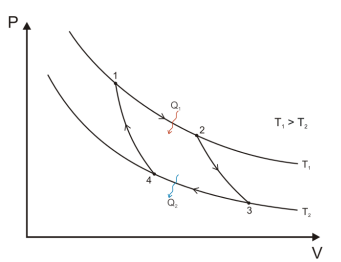

(figure credit to Wikipedia)

The efficiency of a Carnot cycle operating between a hot reservoir at absolute temperature and a cold reservoir at is:

$\eta = 1-\frac {T_c}{T_H}$

For our purposes, we'll assume that the working fluid is one mole of an ideal gas, and hence . As a reminder, along an ideal gas adiabat, is a constant, where is the heat capacity ratio , which is equal to 5/3 for a monatomic ideal gas and 7/5 for a diatomic ideal gas.

The overarching goal will be to build up a set of code that can take as inputs:


*   the temperatures of the hot and cold reservoirs, and
*   the minimum and maximum volumes achieved by the working fluid

and give as outputs:


*   a plot of the PV diagram for that cycle
*   the efficiency of the cycle

 (If it's not clear to you why those inputs are all you need for these outputs and anything beyond that would overspecify the problem, spend a moment thinking about it before we start and try to convince yourself that it's
true...if you can't, hopefully you'll be able to by the end!)

##Write some functions! (1 point each)
There are three primary functions we will write and then combine together to achieve our goals. They are functions to:
1. Given a range of volumes and a temperature, compute the pressures at each volume corresponding to
the isotherm at that temperature.
2. Given a range of volumes, a pressure corresponding to the first volume, and a heat capacity ratio,
compute the pressures and temperatures at each volume corresponding to the adiabat that goes through
the first PV point.
3. Given the two reservoir temperatures, compute the efficiency of the cycle.

####Function 1: Isotherm
Here is some pseudocode for computing an isotherm in bullet point form:

*   input arguments to function: T (a scalar value) and a vector V_vals
*   assign a variable R, the ideal gas constant (8.314 J/molK)
*   use PV=RT to compute pressures at each volume for the input temperature
*   output: vector of P_vals

In another file, write this function and call it "isotherm".
Test it below and make sure you can produce an isotherm similar to the plot below.

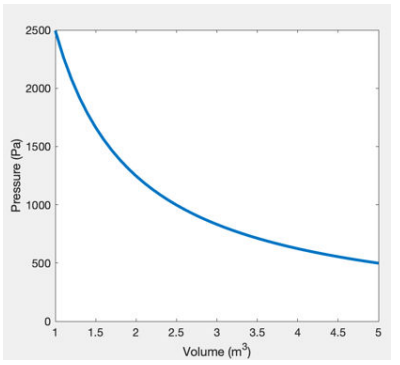


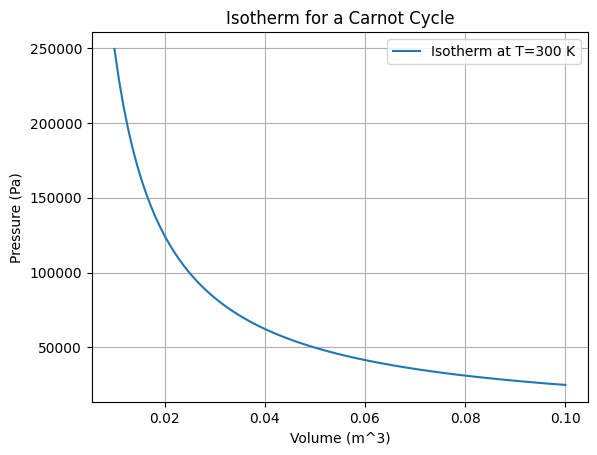

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def isotherm(T, V_vals):
    R = 8.314
    P_vals = (R * T) / V_vals

    return P_vals

T = 300
V_vals = np.linspace(0.01, 0.1, 100)

P_vals = isotherm(T, V_vals)

plt.plot(V_vals, P_vals, label=f'Isotherm at T={T} K')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (Pa)')
plt.title('Isotherm for a Carnot Cycle')
plt.grid(True)
plt.show()


####Function 2: Adiabat

The structure of the code for computing adiabats is similar, with one extra step:

*   input arguments: V_vals (vector), gamma (scalar), P1 (scalar value corresponding to the pressure at the first value in V_vals)

*   compute for first entry in V_vals
*   solve for the P values corresponding to each V value such that is constant along the curve
*    using the P and V values and the ideal gas law, compute the temperature at each point
*   output: vector of P_vals, vector of T_vals

Write this function and call it "adiabat". Test it out below and make sure you can produce an adiabatic curve similar to below (which was computed assuming a monatomic ideal gas).
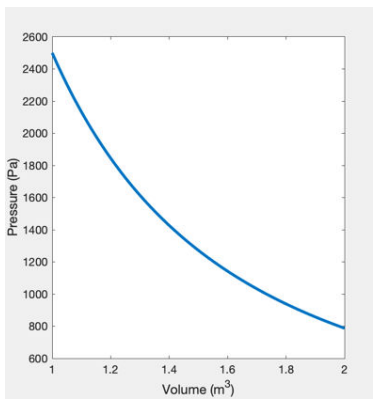


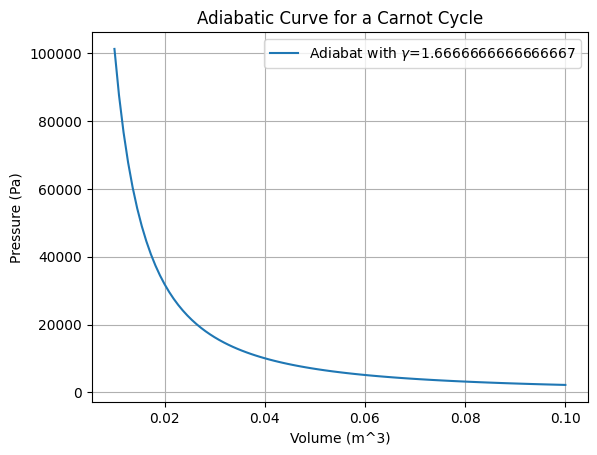

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def adiabat(V_vals, gamma, P1):

    R = 8.314
    V1 = V_vals[0]
    P_vals = P1 * (V1 / V_vals) ** gamma
    T_vals = (P_vals * V_vals) / R

    return P_vals, T_vals

V_vals = np.linspace(0.01, 0.1, 100)
gamma = 5/3
P1 = 101325

P_vals, T_vals = adiabat(V_vals, gamma, P1)

plt.plot(V_vals, P_vals, label=f'Adiabat with $\gamma$={gamma}')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (Pa)')
plt.title('Adiabatic Curve for a Carnot Cycle')
plt.legend()
plt.grid(True)
plt.show()


####Function 3: Efficiency

This function is a one-liner, write the function to compute efficiency as an function in the cell below:

In [ ]:
def efficiency(T_cold, T_hot):
    return 1 - (T_cold / T_hot)

###Put them together! (3 points)

To combine these functions together and actually compute our engine cycle, follow the psuedocode procedure below:


*   define our volume range and cold and hot temperatures
*   find the point labeled 1 on the cycle plot by computing the pressure associated with the lowest volumeand the hot reservoir temperature from the ideal gas law
*   find point 3 similarly, with the highest volume and cold temperature
*   compute the adiabats going up in volume from point 1 and down in volume from point 3 using your adiabat function
*   truncate these two adiabats at the temperature corresponding to the other isotherm (starting from point 1 will increase V and decrease T until T_c is reached, vice versa from point 3 to T_h), call these volumes V_2 and V_4 respectively
*   compute the isotherms at from min volume to V_2 at T_h and V_4 to maximum volume at T_c using your
isotherm function
*   you should now have the sets of P, V values along each of the four sections of the cycle! Make a plot!

Convert the bullet-point pseudocode above into real code below and test it out for a few different volume ranges and temperature pairs. One example plot is given below for you to see if your numbers are working out properly
(it used 300K and 500K as temperatures and assumed a monatomic ideal gas).

Note that it can be a bit tricky to get the truncation to work out; a helpful debugging trick may be to skip the truncation initially and just plot all four curves across the full V range, then truncate one by one to check that
you're getting the indexing right.

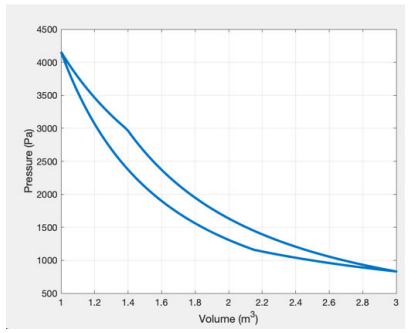


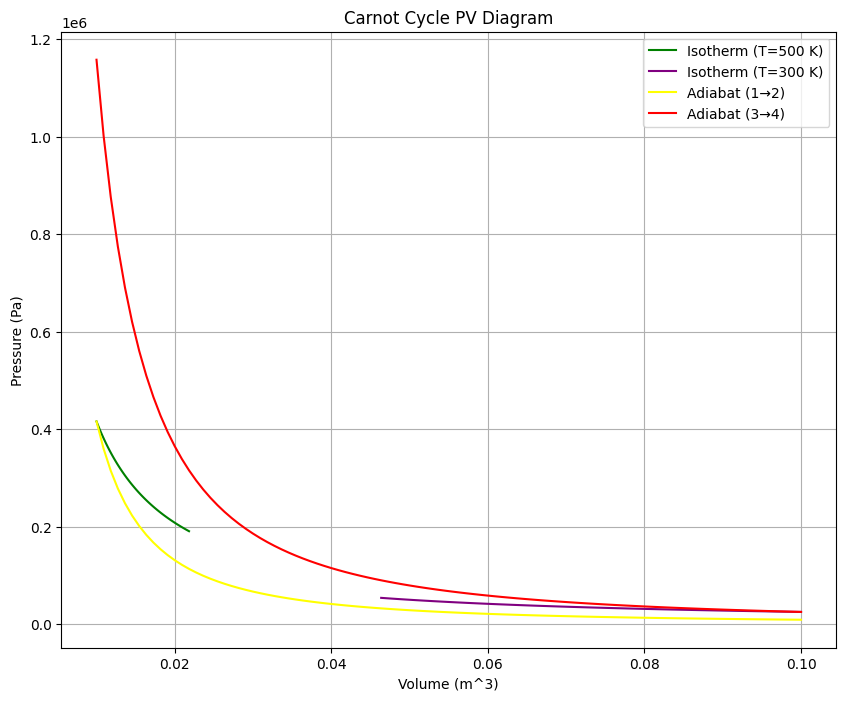

Carnot Cycle Efficiency: 40.00%


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def isotherm(T, V_vals):
  #There was a problem with my original code when I tried to implement this function
  #I had the built in AI fix the error
    R = 8.314
    if isinstance(V_vals, (list, np.ndarray)):
        P_vals = [ (R * T) / V for V in V_vals ]
    else:
        P_vals = (R * T) / V_vals
    return P_vals

def adiabat(V_vals, gamma, P1):
    R = 8.314
    V1 = V_vals[0]
    P_vals = P1 * (V1 / V_vals) ** gamma
    T_vals = (P_vals * V_vals) / R
    return P_vals, T_vals

def efficiency(T_cold, T_hot):
    return 1 - (T_cold / T_hot)

T_hot = 500
T_cold = 300

plt.figure(figsize=(10, 8))

plt.plot(V_isotherm_1_2, P_isotherm_1_2, label=f'Isotherm (T={T_hot} K)', color='green')
plt.plot(V_isotherm_3_4, P_isotherm_3_4, label=f'Isotherm (T={T_cold} K)', color='purple')

plt.plot(V_vals, P_adiabatic_1, label='Adiabat (1→2)', color='yellow')
plt.plot(V_vals[::-1], P_adiabatic_3, label='Adiabat (3→4)', color='red')

plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (Pa)')
plt.title('Carnot Cycle PV Diagram')
plt.legend()
plt.grid(True)
plt.show()

eta = efficiency(T_cold, T_hot)
print(f'Carnot Cycle Efficiency: {eta * 100:.2f}%')


## Interactive Functionlity (2 points)

It is possible to add interactive element in matplot lib. Research the use of sliders as a widget and create a plot that has 2 or more  sets of data and allows you to change the values of the data using widgets using sliders and updates the plot accordingly.


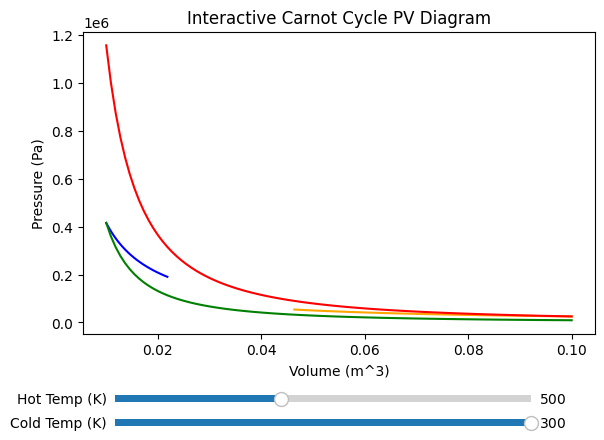

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def isotherm(T, V_vals):
    R = 8.314
    if isinstance(V_vals, (list, np.ndarray)):
        P_vals = [ (R * T) / V for V in V_vals ]
    else:
        P_vals = (R * T) / V_vals
    return P_vals

def adiabat(V_vals, gamma, P1):
    R = 8.314
    V1 = V_vals[0]
    P_vals = P1 * (V1 / V_vals) ** gamma
    T_vals = (P_vals * V_vals) / R
    return P_vals, T_vals

def efficiency(T_cold, T_hot):
    return 1 - (T_cold / T_hot)

T_hot = 500
T_cold = 300

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)
ax.set_xlabel("Volume (m^3)")
ax.set_ylabel("Pressure (Pa)")
ax.set_title("Interactive Carnot Cycle PV Diagram")


plot_carnot_cycle(T_hot, T_cold)
ax_T_hot = plt.axes([0.15, 0.1, 0.65, 0.03])
slider_T_hot = Slider(ax_T_hot, 'Hot Temp (K)', 300, 800, valinit=T_hot)
#when I looked up how to do the slider it doesnt sat how to make it interctive on the graph, only if you change in the code
ax_T_cold = plt.axes([0.15, 0.05, 0.65, 0.03])
slider_T_cold = Slider(ax_T_cold, 'Cold Temp (K)', 100, 300, valinit=T_cold)

def update(val):
    ax.set_xlabel("Volume (m^3)")
    ax.set_ylabel("Pressure (Pa)")
    ax.set_title("Interactive Carnot Cycle PV Diagram")

    T_hot = slider_T_hot.val
    T_cold = slider_T_cold.val

    plot_carnot_cycle(T_hot, T_cold)
    fig.canvas.draw_idle()

slider_T_hot.on_changed(update)
slider_T_cold.on_changed(update)

plt.show()
